## DNN Example for Fashion MNIST Dataset


In [28]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [31]:
# Load Fashion MNIST Dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [32]:
# Class labels
class_names = [
    "T-shirt",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

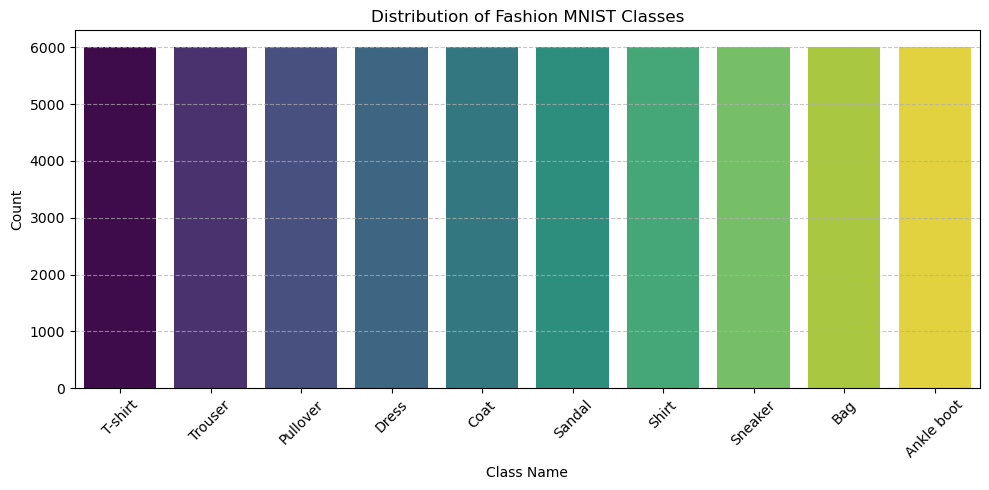

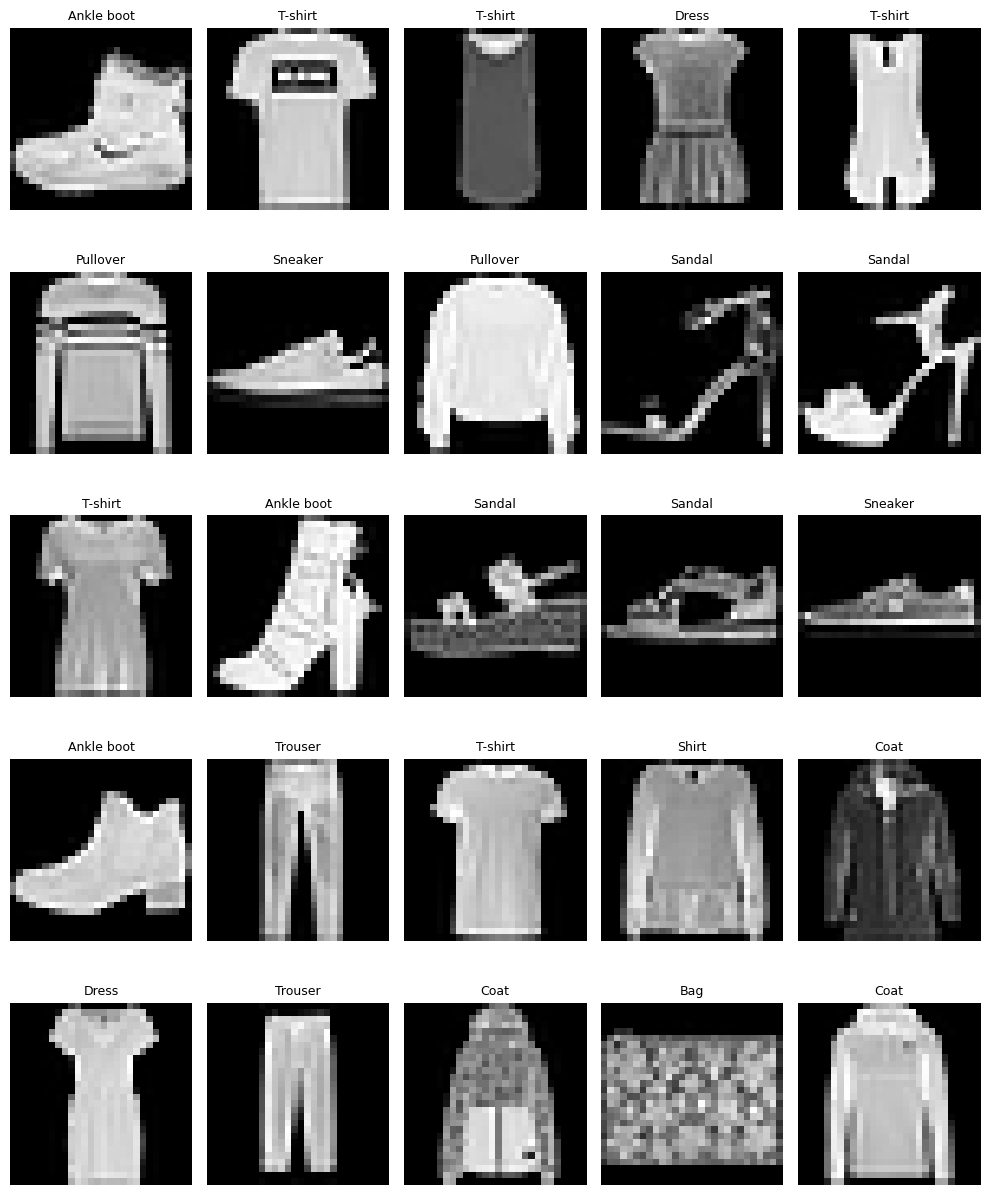

In [33]:
# Plot label distribution
def plot_label_distribution(labels, class_names):
    plt.figure(figsize=(10, 5))
    sns.countplot(x=labels, hue=labels, palette="viridis", legend=False)
    plt.xticks(np.arange(10), class_names, rotation=45)
    plt.title("Distribution of Fashion MNIST Classes")
    plt.xlabel("Class Name")
    plt.ylabel("Count")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()


# Plot sample images
def plot_fashion_mnist(images, labels, class_names, rows=5, cols=5):
    plt.figure(figsize=(2 * cols, 2.5 * rows))
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i], cmap="gray")
        plt.title(class_names[labels[i]], fontsize=9)
        plt.axis("off")
    plt.tight_layout()
    plt.show()


plot_label_distribution(y_train, class_names)
plot_fashion_mnist(x_train, y_train, class_names)

In [35]:
# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten input images
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [36]:
def create_model():
    initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05)
    model = models.Sequential(
        [
            layers.Input(shape=(784,)),
            layers.Dense(512, kernel_initializer=initializer),
            layers.BatchNormalization(),
            layers.Activation("relu"),
            layers.Dropout(0.4),
            layers.Dense(256, kernel_initializer=initializer),
            layers.BatchNormalization(),
            layers.Activation("relu"),
            layers.Dropout(0.3),
            layers.Dense(128, kernel_initializer=initializer),
            layers.BatchNormalization(),
            layers.Activation("relu"),
            layers.Dropout(0.2),
            layers.Dense(64, kernel_initializer=initializer),
            layers.BatchNormalization(),
            layers.Activation("relu"),
            layers.Dropout(0.1),
            layers.Dense(10, activation="softmax"),
        ]
    )
    return model

In [37]:
model = create_model()
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [38]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_43 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 578,890 (2.21 MB)

 Trainable params: 576,970 (2.20 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [39]:
# Train the model
history = model.fit(
    x_train, y_train, validation_split=0.2, epochs=20, batch_size=128, verbose=2
)

Epoch 1/20
375/375 - 16s - 42ms/step - accuracy: 0.7772 - loss: 0.6488 - val_accuracy: 0.1505 - val_loss: 2.5093
Epoch 2/20
375/375 - 6s - 16ms/step - accuracy: 0.8422 - loss: 0.4456 - val_accuracy: 0.8182 - val_loss: 0.4827
Epoch 3/20
375/375 - 6s - 15ms/step - accuracy: 0.8556 - loss: 0.4034 - val_accuracy: 0.8335 - val_loss: 0.4518
Epoch 4/20
375/375 - 6s - 15ms/step - accuracy: 0.8666 - loss: 0.3740 - val_accuracy: 0.8508 - val_loss: 0.3980
Epoch 5/20
375/375 - 5s - 14ms/step - accuracy: 0.8739 - loss: 0.3503 - val_accuracy: 0.8060 - val_loss: 0.5385
Epoch 6/20
375/375 - 6s - 15ms/step - accuracy: 0.8777 - loss: 0.3394 - val_accuracy: 0.8133 - val_loss: 0.5347
Epoch 7/20
375/375 - 5s - 14ms/step - accuracy: 0.8821 - loss: 0.3253 - val_accuracy: 0.8569 - val_loss: 0.4037
Epoch 8/20
375/375 - 6s - 15ms/step - accuracy: 0.8865 - loss: 0.3112 - val_accuracy: 0.8289 - val_loss: 0.4615
Epoch 9/20
375/375 - 6s - 15ms/step - accuracy: 0.8909 - loss: 0.3000 - val_accuracy: 0.8633 - val_loss

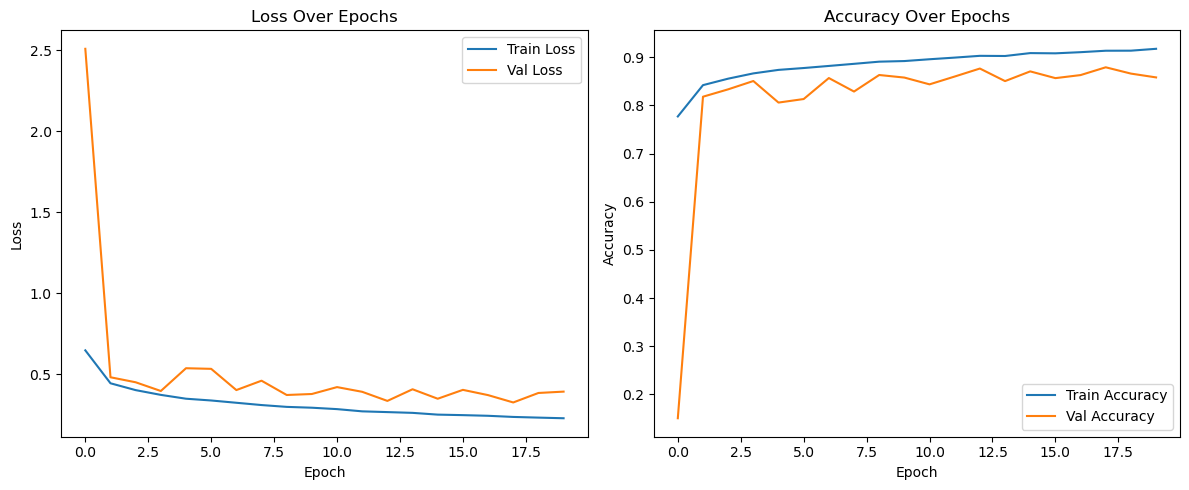

In [40]:
# Plot Training History
def plot_history(history):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Val Loss")
    plt.title("Loss Over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history["accuracy"], label="Train Accuracy")
    plt.plot(history.history["val_accuracy"], label="Val Accuracy")
    plt.title("Accuracy Over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()


plot_history(history)

In [42]:
# Evaluate Model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

Test Accuracy: 0.8533


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


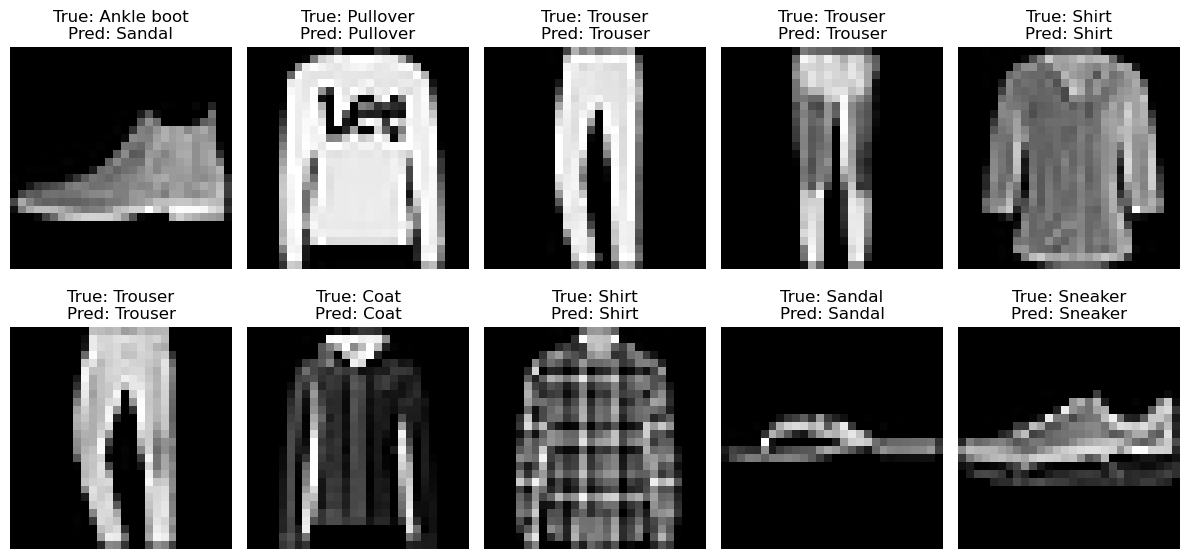

In [43]:
# Predict and visualize sample results
def show_predictions(model, x_test, y_test):
    preds = model.predict(x_test)
    pred_classes = np.argmax(preds, axis=1)

    plt.figure(figsize=(12, 6))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
        plt.title(
            f"True: {class_names[y_test[i]]}\nPred: {class_names[pred_classes[i]]}"
        )
        plt.axis("off")
    plt.tight_layout()
    plt.show()


show_predictions(model, x_test, y_test)

## ResNet (DNN) Example for Fashion MNIST Dataset


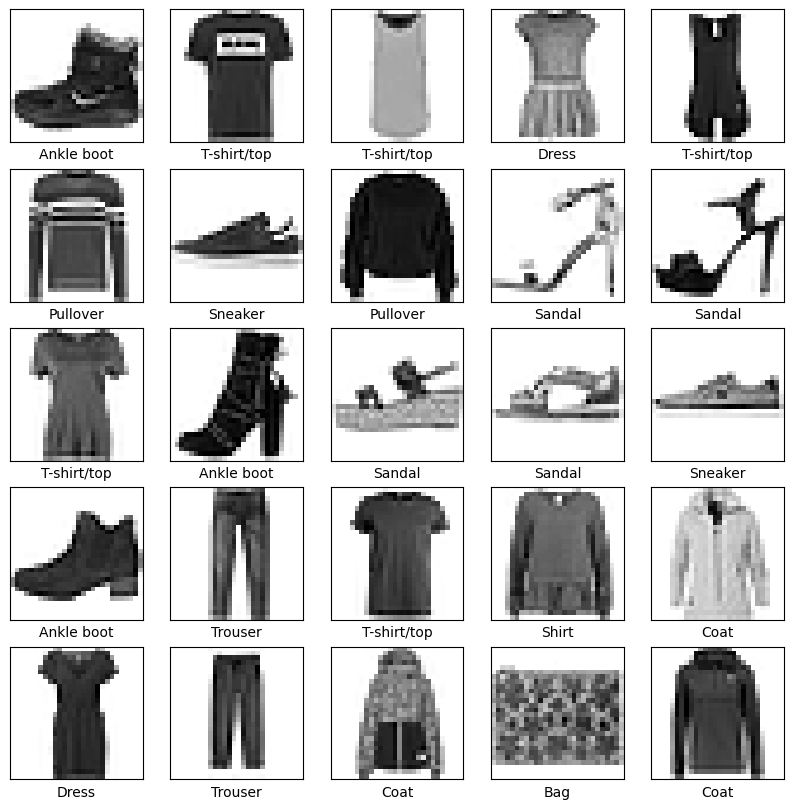

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Add, Activation, Flatten
from tensorflow.keras.utils import to_categorical

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Flatten the images for DNN
x_train_flat = x_train.reshape(-1, 28 * 28)
x_test_flat = x_test.reshape(-1, 28 * 28)

# Visualize some samples
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(y_train[i])])
plt.show()

In [45]:
# Standard DNN Model
def create_dnn():
    inputs = Input(shape=(784,))
    x = Dense(256, activation="relu")(inputs)
    x = Dense(256, activation="relu")(x)
    x = Dense(128, activation="relu")(x)
    x = Dense(64, activation="relu")(x)
    outputs = Dense(10, activation="softmax")(x)
    return Model(inputs, outputs)


# ResNet-style DNN Model (with residual connections)
def create_resnet_dnn():
    inputs = Input(shape=(784,))

    # Initial dense layer
    x = Dense(256, activation="relu")(inputs)

    # Residual block 1
    x1 = Dense(256, activation="relu")(x)
    x2 = Dense(256, activation="relu")(x1)
    res1 = Add()([x, x2])  # Skip connection
    res1 = Activation("relu")(res1)

    # Residual block 2
    x3 = Dense(128, activation="relu")(res1)
    x4 = Dense(128, activation="relu")(x3)
    # Need to match dimensions for the skip connection
    res1_down = Dense(128, activation="relu")(res1)  # Projection to match dimensions
    res2 = Add()([res1_down, x4])
    res2 = Activation("relu")(res2)

    # Final layers
    x_final = Dense(64, activation="relu")(res2)
    outputs = Dense(10, activation="softmax")(x_final)

    return Model(inputs, outputs)

In [46]:
# Create and compile models
dnn_model = create_dnn()
resnet_model = create_resnet_dnn()

dnn_model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)
resnet_model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

In [47]:
# Train models
dnn_history = dnn_model.fit(
    x_train_flat, y_train, epochs=10, batch_size=128, validation_split=0.2, verbose=1
)

resnet_history = resnet_model.fit(
    x_train_flat, y_train, epochs=10, batch_size=128, validation_split=0.2, verbose=1
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7359 - loss: 0.7510 - val_accuracy: 0.8345 - val_loss: 0.4480
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8568 - loss: 0.3907 - val_accuracy: 0.8652 - val_loss: 0.3657
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8757 - loss: 0.3375 - val_accuracy: 0.8708 - val_loss: 0.3490
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8843 - loss: 0.3130 - val_accuracy: 0.8807 - val_loss: 0.3300
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8869 - loss: 0.3035 - val_accuracy: 0.8830 - val_loss: 0.3295
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8988 - loss: 0.2724 - val_accuracy: 0.8718 - val_loss: 0.3675
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9001 - loss: 0.2708 - val_accuracy: 0.8878 - val_loss: 0.3118
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9041 - loss: 0.2503 - val_accuracy:

In [48]:
# Plot training history
def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    plt.suptitle(title)

    plt.subplot(1, 2, 1)
    plt.plot(history.history["accuracy"], label="Train Accuracy")
    plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
    plt.title("Accuracy")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.title("Loss")
    plt.legend()

    plt.show()

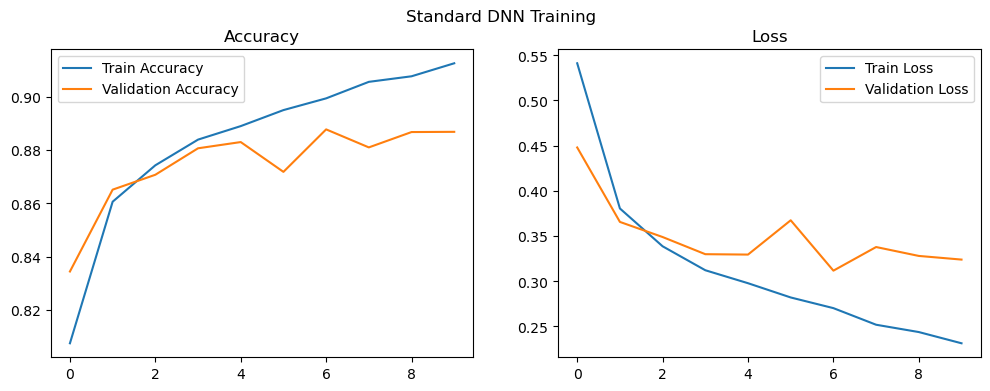

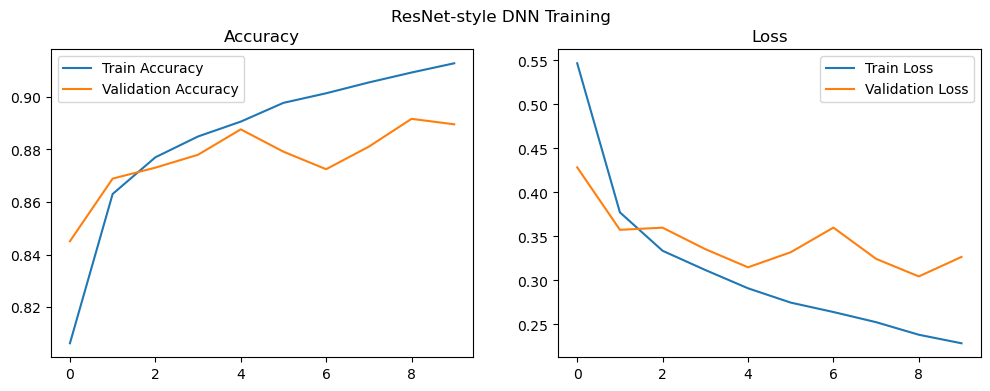

In [49]:
plot_history(dnn_history, "Standard DNN Training")
plot_history(resnet_history, "ResNet-style DNN Training")

In [50]:
# Evaluate on test set
dnn_test_loss, dnn_test_acc = dnn_model.evaluate(x_test_flat, y_test, verbose=0)
resnet_test_loss, resnet_test_acc = resnet_model.evaluate(
    x_test_flat, y_test, verbose=0
)

In [51]:
print(f"Standard DNN Test Accuracy: {dnn_test_acc:.4f}")
print(f"ResNet-style DNN Test Accuracy: {resnet_test_acc:.4f}")

Standard DNN Test Accuracy: 0.8782
ResNet-style DNN Test Accuracy: 0.8813



Standard DNN Predictions:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


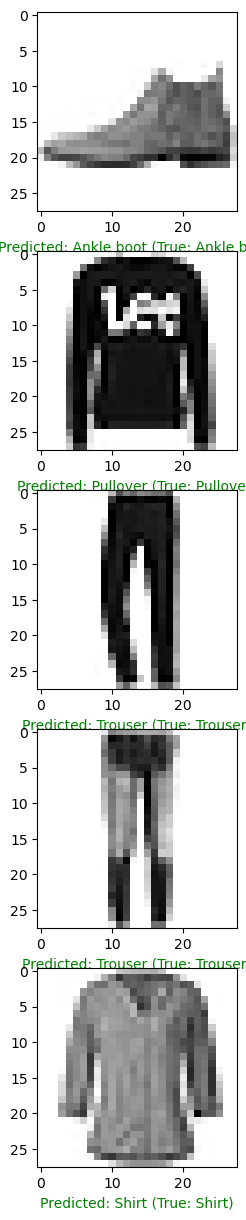


ResNet-style DNN Predictions:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


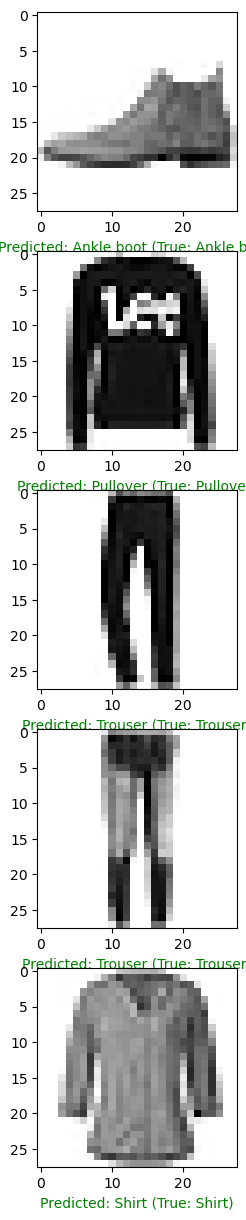

In [52]:
# Make predictions and visualize some results
def plot_predictions(model, x_test, y_test, num_images=5):
    predictions = model.predict(x_test)
    plt.figure(figsize=(15, 3 * num_images))
    for i in range(num_images):
        plt.subplot(num_images, 1, i + 1)
        plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)
        pred_label = np.argmax(predictions[i])
        true_label = np.argmax(y_test[i])
        color = "green" if pred_label == true_label else "red"
        plt.xlabel(
            f"Predicted: {class_names[pred_label]} (True: {class_names[true_label]})",
            color=color,
        )
    plt.show()


print("\nStandard DNN Predictions:")
plot_predictions(dnn_model, x_test_flat, y_test)

print("\nResNet-style DNN Predictions:")
plot_predictions(resnet_model, x_test_flat, y_test)